In [ ]:
data_dir = "/Net/elnino/data/obs/ERA5/global/daily/"

In [29]:
from data_loader import dataset_Block as dB


data_dir = "/Net/elnino/data/obs/ERA5/global/daily/"
year = [2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]
year = year[:10]
offsets =[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40]
# year = year[:10]
# file_dic = ds.createFileInfoDict(data_dir)
variables = ['tp', 'mslp', 't2m', 'u200', 'u850', 'v200', 'v850']

variables = variables[:1]
channels = len(variables)
test_year = [1990,1991,1992,1993,1994,1995,1996,1997,1998,1999]

# test_year = [2002,2004]
test_year = test_year[:4]
train_data = dB.NetCDFDataset(data_dir,year,offsets,variables=variables)
test_data = dB.NetCDFDataset(data_dir,test_year,offsets,variables=variables)

In [30]:
x, y =train_data[10]

x.shape

torch.Size([])

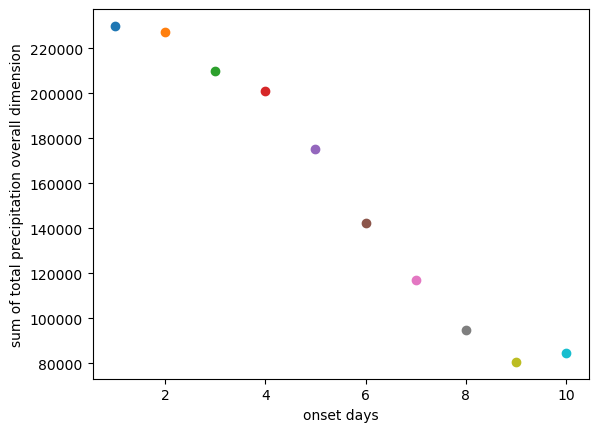

In [3]:
import torch
import matplotlib.pyplot as plt
for i in range(len(train_data)):
    tensor1, tensor2 = train_data[i]
    # Assuming __getitem__ returns (tensor1, tensor2) tuple
    # Compute the average values for the full batch and plot
    # sum_by_batch = torch.sum(tensor1[:,0], dim=0)
    # sum_by_anomaly = torch.sum(tensor1[:,1], dim = 0)
    # Scatter this sum vs the target
    plt.scatter(tensor2.cpu().numpy(),tensor1.cpu().numpy())
    # plt.scatter(tensor2.cpu().numpy(),sum_by_anomaly.cpu().numpy())
    
    # plt.xlabel('Sum of input values')
    # plt.ylabel('Target values')
    # plt.title('Sum of input values vs target values')
    # plt.savefig('sum_vs_target.png')
    # plt.show()
    # Plot tensor2
    # plt.scatter(tensor2_np, tensor1_np[0][1] ,label=f'Data {i} - Tensor 2')

# Add labels and legend
plt.ylabel('sum of total precipitation overall dimension')
plt.xlabel('onset days')

plt.title('')
plt.show()

In [14]:

from model import NNmodel as nModel

from model import NNmodel as nModel
from torch.utils.data import DataLoader
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim

from torch.utils.tensorboard import SummaryWriter
from datetime import datetime

model= nModel.DenseModel(input_size=1, hidden_size=10, num_layers=10)


In [28]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print()
model = model.to(device)

# Define your loss function
criterion = nn.MSELoss()
writer = SummaryWriter(f'logs/run{datetime.now().strftime("%Y-%m-%d_%H-%M-%S")}')
# Define your optimizer
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Number of epochs
epochs = 10000
mc_samples = 10
batch_size = 5
patience = 25  # Number of epochs to wait for improvement
min_delta = 0.001  # Minimum change in validation loss to qualify as improvement
best_val_loss = float('inf')
learning_rate = 0.001
epochs_no_improve = 0
# Initialize lists to store the predicted outputs and true values for later analysis
predicted_outputs = []
true_values = []

# Create DataLoader for training data
# train_dataset = TensorDataset(x_train, y_train)
train_loader = DataLoader(train_data, batch_size=batch_size)

# # Create DataLoader for validation data
# val_dataset = TensorDataset(x_val, y_val)
val_loader = DataLoader(test_data,batch_size=batch_size)
train_losses = []
val_losses = []

for epoch in range(epochs):
    # Forward pass
    running_loss = 0.0
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        
        # Forward pass
        outputs = model(inputs.unsqueeze(1))
    
        loss = criterion(outputs, targets)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    # Calculate average training loss
    avg_train_loss = running_loss / len(train_loader)
    
    # Validation
    model.eval()
    with torch.no_grad():
        val_loss = 0.0
        for val_inputs, val_targets in val_loader:
            val_inputs, val_targets = val_inputs.to(device), val_targets.to(device)
            val_outputs = model(val_inputs.unsqueeze(1))
            val_loss += criterion(val_outputs, val_targets).item()
        avg_val_loss = val_loss / len(val_loader)
    
    # Print training and validation loss
    if epoch % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {avg_train_loss}, Val Loss: {avg_val_loss}')
    
    # Check if validation loss has improved
    if avg_val_loss + min_delta < best_val_loss:
        best_val_loss = avg_val_loss
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1
    
    # Check if early stopping criteria are met
    if epochs_no_improve >= patience:
        print(f'Early stopping after {epoch+1} epochs with no improvement in validation loss.')
        break



# Training loop
# for epoch in range(epochs):
#     model.train()  # Set model to training mode
#     running_loss = 0.0

#     # For each batch in the training data
#     count = 0
#     for inputs, targets in train_loader:
#         count+=1
#         # inputs.permute(1,0,2)
#         inputs, targets = inputs.to(device), targets.to(device)

#         # Compute the average values for the full batch and plot
#         # sum_by_batch = torch.sum(inputs[:,:,0,:,:], dim=(1, 2, 3))
#         # sum_by_batch = inputs[:,0]
#         # print(sum_by_batch.shape)
#         # # Scatter this sum vs the target
#         # plt.scatter(targets.cpu().numpy(),sum_by_batch.cpu().numpy())
#         # plt.xlabel('Sum of input values')
#         # plt.ylabel('Target values')
#         # plt.title('Sum of input values vs target values')
#         # plt.savefig('sum_vs_target.png')
#         # plt.show()

#         # plt.close()
#         # sum_anomaly_by_batch = torch.sum(inputs[:,:,1,:,:], dim=(1, 2, 3))
#         # plt.scatter(targets.cpu().numpy(),sum_anomaly_by_batch.cpu().numpy())
#         # plt.xlabel('Sum of input values')
#         # plt.ylabel('Target values')
#         # plt.title('Sum of input values vs target values')
#         # plt.savefig('sumanomaly_vs_target.png')
#         # plt.show()
        
#         # Zero gradients, perform a forward pass with dropout enabled, and compute loss
#         optimizer.zero_grad()
#         # TODO just make a dense network with 2 input and 10 neurons and 4 hidden layers with BN in between. Output linear
#         outputs = model(inputs)
#         loss = criterion(outputs.squeeze(1), targets)
#         # plt.imshow(inputs[0][0][0][:][:].cpu().numpy(), cmap='jet')  # Example of a heatmap
#         # # plt.colorbar(label='Temperature')
#         # plt.xlabel('X Axis')
#         # plt.ylabel('Y Axis')
#         # plt.title('Temperature Data')
#         # plt.show()
#         # plt.savefig('temperature_data.png')
#         # plt.close()



#         # Perform Monte Carlo sampling during training
#         # for _ in range(mc_samples):
#         #     outputs = model(inputs)  # Dropout enabled during training
#         #     loss += criterion(outputs, targets)
        
#         # Backpropagation and weight update
#         # loss /= (mc_samples + 1)  # Average loss over Monte Carlo samples
#         loss.backward()
#         optimizer.step()

#         running_loss += loss.item()
#     train_losses.append(running_loss / len(train_loader))

#     # Print average training loss per epoch
#     if (epoch + 1) % 10 == 0:
#         print(f'Epoch [{epoch + 1}/{epochs}]- Train Loss: {(running_loss / len(train_loader)):.5f}', end=', ')
#         writer.add_scalar('Loss/Train', running_loss / len(train_loader), epoch)
#     # Validation
#     if (epoch + 1) % 10 == 0:
#         model.eval()  # Set model to evaluation mode
#         val_running_loss = 0.0

#         with torch.no_grad():  # No need to track gradients for validation
#             for inputs, targets in val_loader:
#                 # targets = targets.
#                 # Add an extra dimension for the model
#                 inputs, targets = inputs.to(device), targets.to(device)
#                 # plt.imshow(inputs[0][1][0][0], cmap='jet')  # Example of a heatmap
#                 # plt.colorbar(label='Temperature')
#                 # plt.xlabel('X Axis')
#                 # plt.ylabel('Y Axis')
#                 # plt.title('Temperature Data')
#                 # plt.show()
#                 # plt.savefig('temperature_data.png')
#                 # Compute model predictions
#                 val_outputs = model(inputs).squeeze()
                
#                 # Compute loss for this batch
#                 val_loss = criterion(val_outputs, targets)
#                 val_running_loss += val_loss.item()
       
#         val_losses.append(val_running_loss / len(val_loader))
#         if val_loss + min_delta < best_val_loss:
#             best_val_loss = val_loss
#             epochs_no_improve = 0
#         else:
#             epochs_no_improve += 1
#         if epochs_no_improve >= patience:
#                 print('Early stopping!')
#                 break
#         # Print average validation loss per epoch
#         print(f'Validation Loss: {(val_running_loss / len(val_loader)):.5f}')
#         writer.add_scalar('Loss/Validation', val_running_loss / len(val_loader), epoch)
#         # print()
# writer.close()

/conda/asugandhi/miniconda3/envs/aieoastorch/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([5])) that is different to the input size (torch.Size([5, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/conda/asugandhi/miniconda3/envs/aieoastorch/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([4, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/10000], Train Loss: 4.431806802749634, Val Loss: 32.41348648071289
Early stopping after 31 epochs with no improvement in validation loss.
